In [1]:
%load_ext autoreload
%autoreload 2

## Analysis of experiments with no bath temperature

Samples with no Bath Temperature, only setpoint

	- 220923_LVS19_0818_1800_720min_T20_001
	- 220923_LVS25_0821_1800_720min_T20_001
	- 220923_LVS20_0819_0600_720min_T20_001
	- 220925_LVS29_0823_1800_720min_T20_001

	- 221006_LVS04_0808_0621_624min_T95_001
	- 221006_LVS06_0809_0600_432min_T95_001
	- 221007_LVS08_0810_0600_720min_T95_001
	- 221007_LVS09_0810_1800_720min_T95_001
	- 221007_LVS10_0811_0600_720min_T95_001
	- 221007_LVS11_0811_1800_720min_T95_001
	- 221007_LVS12_0812_0600_720min_T95_001  

In [2]:
# List of failed experiments
failed_experiments = ['220923_LVS25_0821_1800_720min_T20_001',
                      '220923_LVS19_0818_1800_720min_T20_001',
                      '220925_LVS29_0823_1800_720min_T20_001',
                      '220923_LVS20_0819_0600_720min_T20_001',
                      '221006_LVS04_0808_0621_624min_T95_001',
                      '221006_LVS06_0809_0600_432min_T95_001',
                      '221007_LVS08_0810_0600_720min_T95_001',
                      '221007_LVS09_0810_1800_720min_T95_001',
                      '221007_LVS10_0811_0600_720min_T95_001',
                      '221007_LVS11_0811_1800_720min_T95_001',
                      '221007_LVS12_0812_0600_720min_T95_001'                    
                     ]

Calculate the difference between the `Set Point` and the `Bath temp` (SP-BT). Plot against `Set point`

skipping 221013_LVS44_0831_0600_720min_T95_001


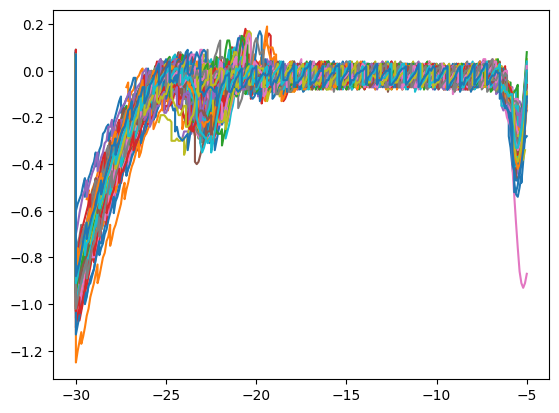

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os

from src import paths

plt.figure(1)

diffs = {key:[] for key in np.linspace(-5, -30, 251).round(1)}

for experiment in os.listdir(paths.processed_data_path):
    
    if not experiment.startswith('.') and experiment not in failed_experiments:
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                     delimiter=',',
                     dtype=[('date', 'datetime64[s]'),
                            ('Setpoit_Temp_°C', '<f8'),
                            ('Bath_Temp_°C', '<f8'),
                            ('FF', '<f8')])        
        
        if data['Setpoit_Temp_°C'][0] > -3:
            continue
        
        if ((data['Setpoit_Temp_°C']-data['Bath_Temp_°C']) < -2).sum() != 0:
            print(f"skipping {experiment}")
            continue
        
        data['Setpoit_Temp_°C'] = data['Setpoit_Temp_°C'].round(1)
        
        for value in data:
            diffs[value['Setpoit_Temp_°C']].append(value['Setpoit_Temp_°C']-value['Bath_Temp_°C'])
            
        
        plt.plot(data['Setpoit_Temp_°C'], data['Setpoit_Temp_°C']-data['Bath_Temp_°C'])       

Create a file where to store the values to be used to estimate the `Bath temp` from the `Set point` for the experiments without `Bath temp`

Text(0.5, 0, 'Setpoint [°C]')

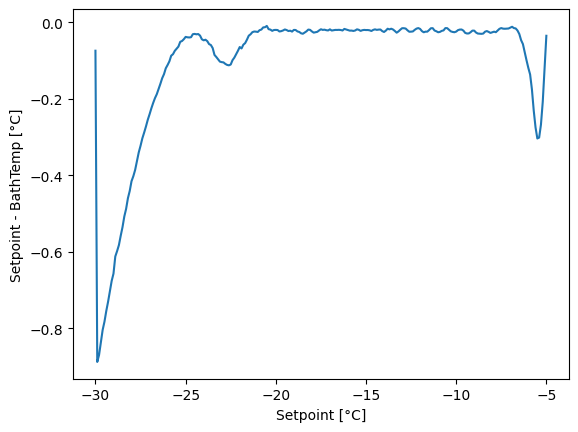

In [18]:
x = []
y = []

with open(paths.interim_data_path / 'temp_corrections.csv', 'wt') as fo:
    for val in diffs:
        x.append(val)
        y.append(np.mean(diffs[val]))

        fo.write(f"{x[-1]},{y[-1]}\n")
        
plt.plot(x, y)
plt.ylabel("Setpoint - BathTemp [°C]")
plt.xlabel("Setpoint [°C]")

In [27]:
def reconstruct_bath_temp(data):

    corrs = np.genfromtxt(paths.interim_data_path / 'temp_corrections.csv',
                     delimiter=',',
                     dtype=[('Setpoit_Temp_°C', '<f8'),
                            ('T_mean_°C', '<f8')])
    
    t_reconstructed = []
    
    for i, line in enumerate(data):
        corr = corrs[corrs['Setpoit_Temp_°C'] == line['Setpoit_Temp_°C'].round(1)]['T_mean_°C'][0]
        t_reconstructed.append(line['Setpoit_Temp_°C'] - corr)
    
    d = data.copy()
    d['Bath_Temp_°C'] = t_reconstructed
    
    return d

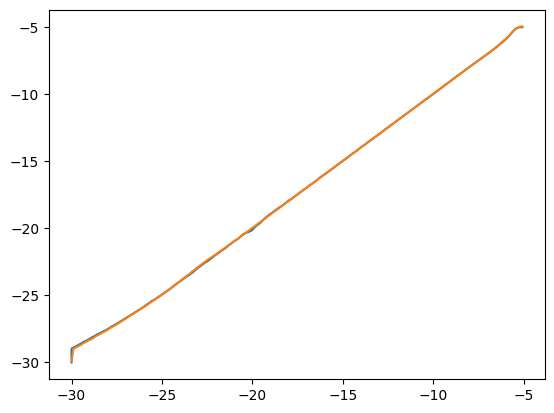

In [30]:
data = np.genfromtxt(paths.processed_data_path / '220922_LVS05_0808_1800_720min_T20_001' / 'frozen_fraction_report.csv',
             delimiter=',',
             dtype=[('date', 'datetime64[s]'),
                    ('Setpoit_Temp_°C', '<f8'),
                    ('Bath_Temp_°C', '<f8'),
                    ('FF', '<f8')])

reconstructed_data = reconstruct_bath_temp(data)

plt.plot(data['Setpoit_Temp_°C'], data['Bath_Temp_°C'])
plt.plot(reconstructed_data['Setpoit_Temp_°C'], reconstructed_data['Bath_Temp_°C'])

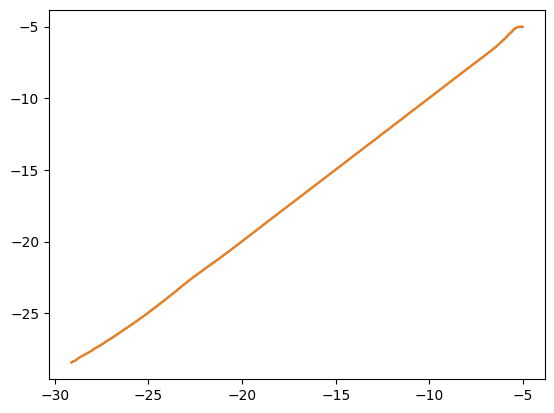

In [32]:
data = np.genfromtxt(paths.processed_data_path / '221006_LVS04_0808_0621_624min_T95_001' / 'frozen_fraction_report.csv',
             delimiter=',',
             dtype=[('date', 'datetime64[s]'),
                    ('Setpoit_Temp_°C', '<f8'),
                    ('Bath_Temp_°C', '<f8'),
                    ('FF', '<f8')])

plt.plot(data['Setpoit_Temp_°C'], data['Bath_Temp_°C'])

reconstructed_data = reconstruct_bath_temp(data)

plt.plot(reconstructed_data['Setpoit_Temp_°C'], reconstructed_data['Bath_Temp_°C'])

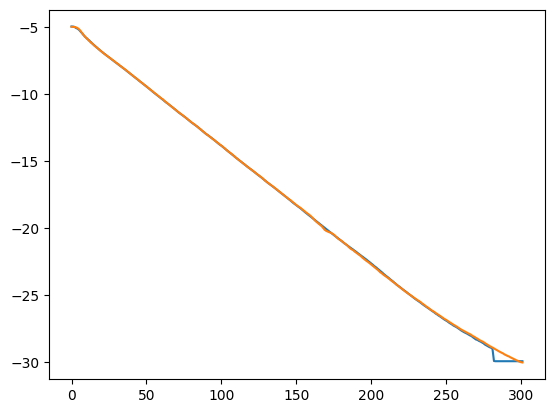

In [113]:
plt.plot(t)
plt.plot(data['Bath_Temp_°C'])

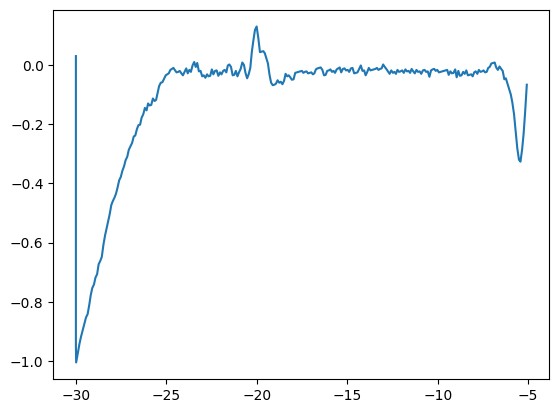

In [83]:
data = np.genfromtxt(paths.processed_data_path / '220922_LVS05_0808_1800_720min_T20_001' / 'frozen_fraction_report.csv',
             delimiter=',',
             dtype=[('date', 'datetime64[s]'),
                    ('Setpoit_Temp_°C', '<f8'),
                    ('Bath_Temp_°C', '<f8'),
                    ('FF', '<f8')])

plt.plot(data['Setpoit_Temp_°C'], data['Setpoit_Temp_°C']-data['Bath_Temp_°C'])